In [77]:
from google.colab import files
uploaded = files.upload()

Saving horror_train.txt to horror_train.txt
Saving mystery_train.txt to mystery_train.txt
Saving philosophy_train.txt to philosophy_train.txt
Saving religion_train.txt to religion_train.txt
Saving romance_train.txt to romance_train.txt
Saving science_train.txt to science_train.txt
Saving science-fiction_train.txt to science-fiction_train.txt
Saving sports_train.txt to sports_train.txt


In [78]:
from google.colab import files
uploaded = files.upload()

Saving horror_test.txt to horror_test.txt
Saving mystery_test.txt to mystery_test.txt
Saving philosophy_test.txt to philosophy_test.txt
Saving religion_test.txt to religion_test.txt
Saving romance_test.txt to romance_test.txt
Saving science_test.txt to science_test.txt
Saving science-fiction_test.txt to science-fiction_test.txt
Saving sports_test.txt to sports_test.txt


In [79]:
import os

# Colab'a yüklenen dosyaları listeleyelim
os.listdir("/content")

['.config',
 '.ipynb_checkpoints',
 'horror_test.txt',
 'religion_train.txt',
 'science_test.txt',
 'mystery_train.txt',
 'philosophy_test.txt',
 'science_train.txt',
 'sports_test.txt',
 'science-fiction_train.txt',
 'sports_train.txt',
 'romance_test.txt',
 'romance_train.txt',
 'religion_test.txt',
 'horror_train.txt',
 'science-fiction_test.txt',
 'mystery_test.txt',
 'philosophy_train.txt',
 'sample_data']

In [80]:
import pandas as pd
import glob

# Yüklenen tüm txt dosyalarını bulalım
train_files = glob.glob("/content/*_train.txt")
test_files = glob.glob("/content/*_test.txt")

def txt_to_dataframe(file_list):
    data = []

    for file_path in file_list:
        label = file_path.split("/")[-1].replace("_train.txt", "").replace("_test.txt", "")  # Dosya adından etiketi al

        with open(file_path, "r", encoding="utf-8") as file:
            lines = file.readlines()

        book_description = []
        for line in lines:
            line = line.strip()
            if line:  # Boş satır değilse açıklamaya ekleyelim
                book_description.append(line)
            else:
                if book_description:  # Boş satır varsa, açıklamayı tamamlayalım
                    text = " ".join(book_description)  # Kitap ismi + açıklamasını birleştirelim
                    data.append([text, label])
                    book_description = []  # Yeni açıklama için sıfırlayalım

        # Son açıklama eklenmemiş olabilir, onu ekleyelim
        if book_description:
            text = " ".join(book_description)
            data.append([text, label])

    return pd.DataFrame(data, columns=["text", "label"])

# Train ve Test veri setlerini oluşturalım
train_df = txt_to_dataframe(train_files)
test_df = txt_to_dataframe(test_files)

# CSV olarak kaydedelim
train_df.to_csv("/content/train.csv", index=False, encoding="utf-8")
test_df.to_csv("/content/test.csv", index=False, encoding="utf-8")

print("Dönüştürme tamamlandı! CSV dosyaları oluşturuldu.")

Dönüştürme tamamlandı! CSV dosyaları oluşturuldu.


In [81]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

print("Train Verisinden İlk 5 Satır:")
print(df_train.head())

print("\nTest Verisinden İlk 5 Satır:")
print(df_test.head())

Train Verisinden İlk 5 Satır:
                                                text            label
0  The God Delusion A preeminent scientist - and ...         religion
1  And Then There Were None First, there were ten...          mystery
2  A Brief History of Time In the ten years since...          science
3  Ender's Game Andrew Ender Wiggin thinks he is ...  science-fiction
4  Moneyball: The Art of Winning an Unfair Game B...           sports

Test Verisinden İlk 5 Satır:
                                                text       label
0  The Haunting of Hill House It is the story of ...      horror
1  The Origin of Species Darwin's theory of natur...     science
2  Man's Search for Meaning Psychiatrist Viktor F...  philosophy
3  Kulti Trust me, I ve wanted to punch you in th...      sports
4  Me Before You From the #1 New York Times bests...     romance


**Veri Ön İşleme**

In [82]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Gerekli verileri indirelim
nltk.download('stopwords')
nltk.download('wordnet')

# Stopword ve lemmatizer tanımlayalım
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Metin temizleme fonksiyonu
def clean_text(text):
    text = text.lower()  # Küçük harfe çevir
    text = re.sub(r'\d+', '', text)  # Sayıları kaldır
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Stopwords temizle + Lemmatization
    return text

# Train ve Test verilerini okuyalım
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Metinleri temizleyelim
train_df["text"] = train_df["text"].apply(clean_text)
test_df["text"] = test_df["text"].apply(clean_text)

# Temizlenmiş veriyi kaydedelim
train_df.to_csv("/content/train_cleaned.csv", index=False)
test_df.to_csv("/content/test_cleaned.csv", index=False)

print("Metin temizleme tamamlandı!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Metin temizleme tamamlandı!


**Veri Görselleştirme**

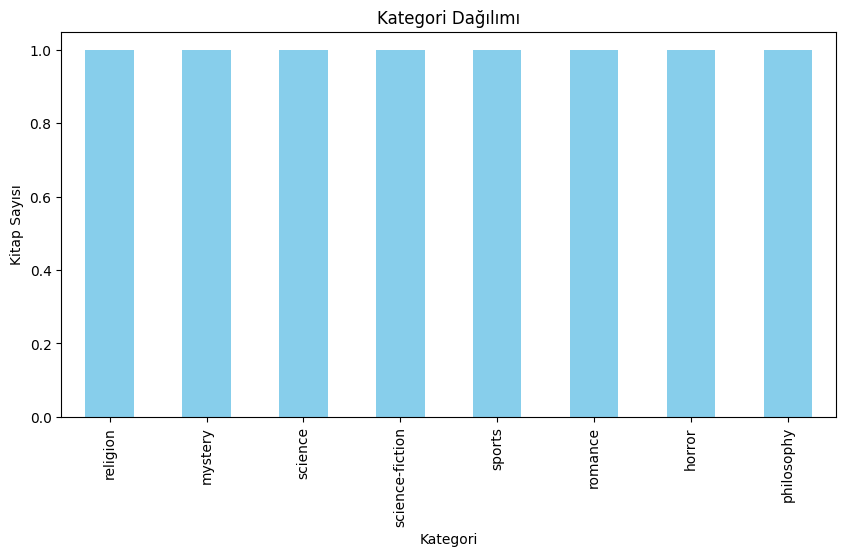

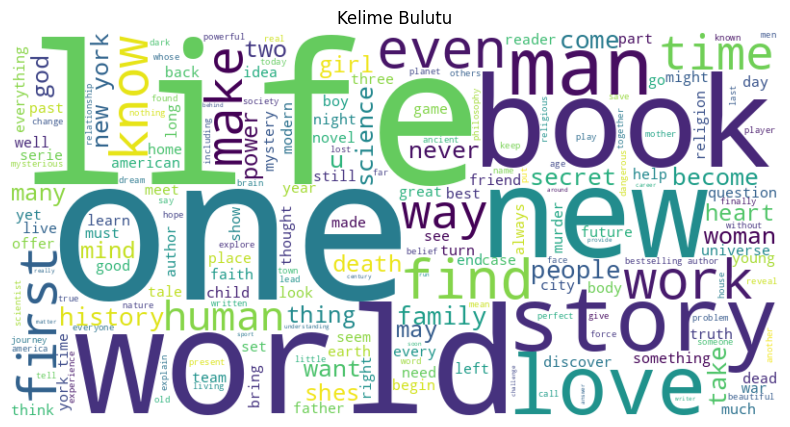

In [83]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Kategori dağılımını görselleştirme
plt.figure(figsize=(10,5))
train_df["label"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Kategori Dağılımı")
plt.xlabel("Kategori")
plt.ylabel("Kitap Sayısı")
plt.show()

# WordCloud ile en sık kelimeleri görselleştirme
text = " ".join(train_df["text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Kelime Bulutu")
plt.show()

Kelime bulutundaki büyük yazılmış kelimeler, metinde sıkça geçen ve ana tema ile ilişkili terimlerdir. "life", "one", "live", "world", "story", "book" gibi kelimeler, yaşam, hikaye, dünya gibi evrensel ve temel temaları yansıtan kelimelerdir. Bu kelimelerin büyük olması, metnin ana konularının bu temalar etrafında şekillendiğini gösteriyor. Özellikle "story" ve "book" kelimeleri, kitabın temel içeriği hakkında bize bilgi verirken, "life" ve "world" gibi kelimeler, yaşam ve çevreyle ilgili geniş çaplı düşünceleri yansıtıyor olabilir. Bu da metnin insanlık, yaşam ve deneyimler gibi derin temalarla ilgili olduğunu söyleyebiliriz.

Aynı zamanda üstteki grafikte veri setimizin dengeli dağıldığını gözlemliyoruz.

Verisetimiz dengeli dağılmıştır.

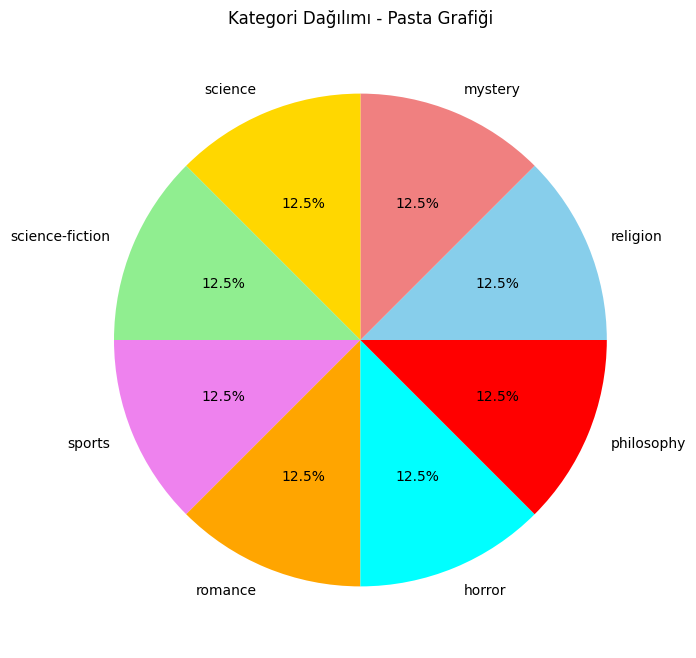

In [84]:
import matplotlib.pyplot as plt

# Kategori dağılımını görselleştirme (Pasta Grafiği)
plt.figure(figsize=(8, 8))
train_df["label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightcoral", "gold", "lightgreen", "violet", "orange", "cyan", "red"])
plt.title("Kategori Dağılımı - Pasta Grafiği")
plt.ylabel("")  # Y-eksenini kaldıralım
plt.show()

Kategorilerimiz dengeli dağılmaktadır.

In [85]:
train_df.head()  # İlk 5 satırı gözlemleyelim

,text,label
0,god delusion preeminent scientist world promin...,religion
1,none first tena curious assortment stranger su...,mystery
2,brief history time ten year since publication ...,science
3,enders game andrew ender wiggin think playing ...,science-fiction
4,moneyball art winning unfair game billy beane ...,sports


In [86]:
print("Eksik değer sayısı:")
print(train_df.isnull().sum())

Eksik değer sayısı:
text     0
label    0
dtype: int64


Eksik değerimiz yoktur.

**1. BoW (Bag of Words) ve TF-IDF Vektörleştirme**

In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# BoW (Bag of Words) vektörizer oluşturalım
bow_vectorizer = CountVectorizer(max_features=5000, stop_words='english')

# TF-IDF vektörizer oluşturalım
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Train verisini dönüştürelim
X_train_bow = bow_vectorizer.fit_transform(train_df["text"])
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["text"])

# Test verisini dönüştürelim
X_test_bow = bow_vectorizer.transform(test_df["text"])
X_test_tfidf = tfidf_vectorizer.transform(test_df["text"])

# Etiketleri alalım
y_train = train_df["label"]
y_test = test_df["label"]

print("BoW ve TF-IDF dönüştürme tamamlandı!")

BoW ve TF-IDF dönüştürme tamamlandı!


In [88]:
import pickle

# BoW verisini kaydedelim
with open("/content/X_train_bow.pkl", "wb") as f:
    pickle.dump(X_train_bow, f)
with open("/content/X_test_bow.pkl", "wb") as f:
    pickle.dump(X_test_bow, f)

# TF-IDF verisini kaydedelim
with open("/content/X_train_tfidf.pkl", "wb") as f:
    pickle.dump(X_train_tfidf, f)
with open("/content/X_test_tfidf.pkl", "wb") as f:
    pickle.dump(X_test_tfidf, f)

print("Vektörler kaydedildi!")

Vektörler kaydedildi!


**MLP Modelini Eğitelim**

In [89]:
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [90]:
# Kaydedilmiş BoW ve TF-IDF vektörlerini yükleyelim
with open("/content/X_train_bow.pkl", "rb") as f:
    X_train_bow = pickle.load(f)
with open("/content/X_test_bow.pkl", "rb") as f:
    X_test_bow = pickle.load(f)

with open("/content/X_train_tfidf.pkl", "rb") as f:
    X_train_tfidf = pickle.load(f)
with open("/content/X_test_tfidf.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f)

# Label Encoding (Kategorik etiketleri sayısal hale getirelim)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encoding yapalım
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

print("Veri hazır!")

Veri hazır!


İlk modelimizde Dropout(0.3) olarak belirlemiştik. Bunu 0.5 yapıp, L2 regularization ekleyelerek modeli iyileştirmeye çalışalım.

In [91]:
from tensorflow.keras.regularizers import l2

def build_mlp_model(input_dim, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.02)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=l2(0.02)),
        Dropout(0.6),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


**MLP Modelini BoW ile Eğitelim**

In [92]:
# Modeli oluşturalım
mlp_bow = build_mlp_model(X_train_bow.shape[1], num_classes)

# Modeli eğitelim
history_bow = mlp_bow.fit(X_train_bow.toarray(), y_train_onehot,
                          validation_data=(X_test_bow.toarray(), y_test_onehot),
                          epochs=18, batch_size=32)

print("MLP modeli BoW ile eğitildi!")

Epoch 1/18


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 128.4569 - val_accuracy: 0.1250 - val_loss: 40.2768
Epoch 2/18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5000 - loss: 85.9551 - val_accuracy: 0.2500 - val_loss: 31.3476
Epoch 3/18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.0000e+00 - loss: 230.7343 - val_accuracy: 0.5000 - val_loss: 31.6227
Epoch 4/18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.2500 - loss: 142.6833 - val_accuracy: 0.2500 - val_loss: 30.0013
Epoch 5/18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1250 - loss: 109.1362 - val_accuracy: 0.2500 - val_loss: 30.2788
Epoch 6/18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.2500 - loss: 154.2079 - val_accuracy: 0.3750 - val_loss: 33.4698
Epoch 7/18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.2500 - loss: 166.0989 - val_accuracy: 0.3750 - val_loss: 33.6437
Epoch 8/18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3750 - loss: 154.8594 - val_accuracy: 0.

**MLP Modelini TF-IDF ile Eğitelim**

In [93]:
# Modeli oluşturalım
mlp_tfidf = build_mlp_model(X_train_tfidf.shape[1], num_classes)

# Modeli eğitelim
history_tfidf = mlp_tfidf.fit(X_train_tfidf.toarray(), y_train_onehot,
                              validation_data=(X_test_tfidf.toarray(), y_test_onehot),
                              epochs=10, batch_size=32)

print("MLP modeli TF-IDF ile eğitildi!")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 27.5034 - val_accuracy: 0.3750 - val_loss: 25.6800
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.2500 - loss: 25.6656 - val_accuracy: 0.3750 - val_loss: 23.9695
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.2500 - loss: 23.9690 - val_accuracy: 0.3750 - val_loss: 22.3593
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.3750 - loss: 22.3452 - val_accuracy: 0.3750 - val_loss: 20.8459
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.2500 - loss: 20.8446 - val_accuracy: 0.6250 - val_loss: 19.4268
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.2500 - loss: 19.4430 - val_accuracy: 0.6250 - val_loss: 18.0984
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5000 - loss: 18.1011 - val_accuracy: 0.7500 - val_loss: 16.8578
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5000 - loss: 16.8506 - val_accuracy: 1.

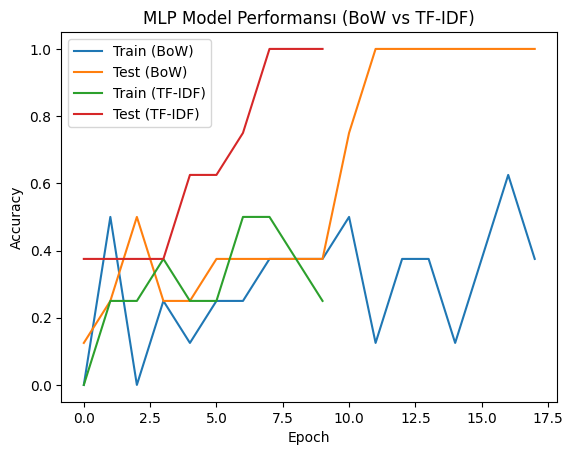

In [94]:
import matplotlib.pyplot as plt

# Eğitim & Doğrulama Doğruluğunu Grafiğe Dökelim
plt.plot(history_bow.history['accuracy'], label='Train (BoW)')
plt.plot(history_bow.history['val_accuracy'], label='Test (BoW)')
plt.plot(history_tfidf.history['accuracy'], label='Train (TF-IDF)')
plt.plot(history_tfidf.history['val_accuracy'], label='Test (TF-IDF)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Model Performansı (BoW vs TF-IDF)')
plt.show()

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# BoW Modeli için Tahminler
y_pred_bow = mlp_bow.predict(X_test_bow.toarray())
y_pred_bow_classes = np.argmax(y_pred_bow, axis=1)

# TF-IDF Modeli için Tahminler
y_pred_tfidf = mlp_tfidf.predict(X_test_tfidf.toarray())
y_pred_tfidf_classes = np.argmax(y_pred_tfidf, axis=1)

# Gerçek etiketler
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Classification Report
print("MLP + BoW Sonuçları:")
print(classification_report(y_test_classes, y_pred_bow_classes, target_names=label_encoder.classes_))

print("\nMLP + TF-IDF Sonuçları:")
print(classification_report(y_test_classes, y_pred_tfidf_classes, target_names=label_encoder.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
MLP + BoW Sonuçları:
                 precision    recall  f1-score   support

         horror       1.00      1.00      1.00         1
        mystery       1.00      1.00      1.00         1
     philosophy       1.00      1.00      1.00         1
       religion       1.00      1.00      1.00         1
        romance       1.00      1.00      1.00         1
        science       1.00      1.00      1.00         1
science-fiction       1.00      1.00      1.00         1
         sports       1.00      1.00      1.00         1

       accuracy                           1.00         8
      macro avg       1.00      1.00      1.00         8
   weighted avg       1.00      1.00      1.00         8


MLP + TF-IDF Sonuçları:
                 precision    recall  f1-score   support

         horror       1.00      1.00      1.00         1
        mystery       1.00      1.00      1.00         1
     philosophy    

Bu sonuçlar, modelin eğitim verisini ezberlediğine işaret edebilir ve overfitting (aşırı uyum) riski taşıyabilir. Her iki model de tüm sınıflarda %100 doğruluk, precision, recall ve f1-score elde etmiş. Bu durum, modelin test verisinde de %100 başarı gösterdiği için ilk bakışta doğru gibi görünebilir, ancak veri setimiz küçük olduğu için yanıltıcı olabileceğini de söyleyebiliriz.

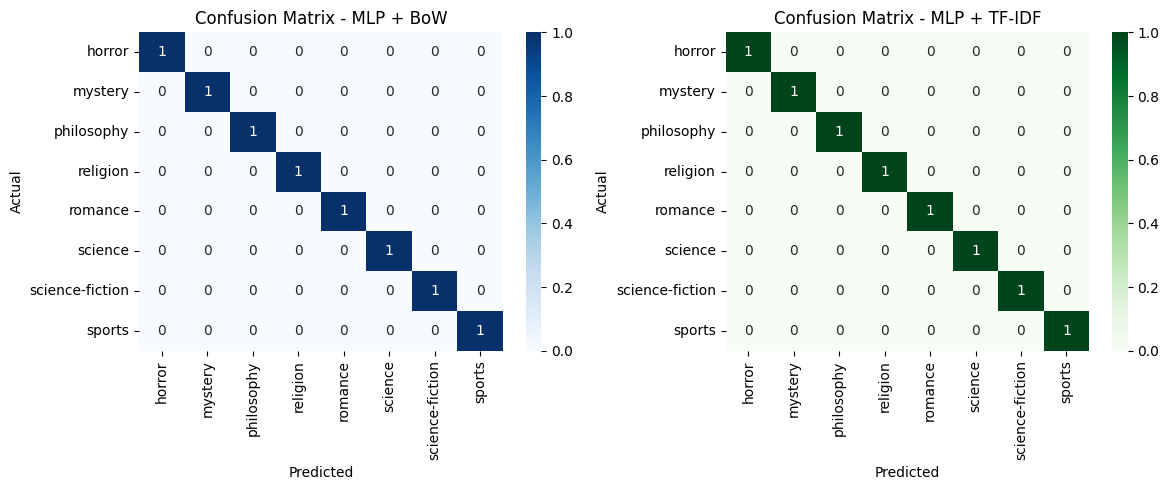

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# BoW için karışıklık matrisi
cm_bow = confusion_matrix(y_test_classes, y_pred_bow_classes)
sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix - MLP + BoW")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# TF-IDF için karışıklık matrisi
cm_tfidf = confusion_matrix(y_test_classes, y_pred_tfidf_classes)
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix - MLP + TF-IDF")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Confusion matrix'teki sonuçlarımız, modelin her sınıfı tamamen doğru bir şekilde sınıflandırdığı anlamına gelir. Bu, modelin mükemmel bir doğruluk gösterdiğini düşündürebilir, ancak küçük veri seti ve sınırlı sayıda örnekle test edilmiş olması, **overfitting olasılığını artırır**. Model, her sınıf için doğru tahminler yapıyor gibi görünse de, bu sonuçlar genelleme yapabilme yeteneğini sorgulatır. **Gerçek dünyada farklı verilerle test edildiğinde bu performans düşebilir.**

In [97]:
for i in range(len(y_test)):
    print(f"Gerçek: {label_encoder.inverse_transform([y_test_classes[i]])[0]} - "
          f"BoW Tahmin: {label_encoder.inverse_transform([y_pred_bow_classes[i]])[0]} - "
          f"TF-IDF Tahmin: {label_encoder.inverse_transform([y_pred_tfidf_classes[i]])[0]}")

Gerçek: horror - BoW Tahmin: horror - TF-IDF Tahmin: horror
Gerçek: science - BoW Tahmin: science - TF-IDF Tahmin: science
Gerçek: philosophy - BoW Tahmin: philosophy - TF-IDF Tahmin: philosophy
Gerçek: sports - BoW Tahmin: sports - TF-IDF Tahmin: sports
Gerçek: romance - BoW Tahmin: romance - TF-IDF Tahmin: romance
Gerçek: religion - BoW Tahmin: religion - TF-IDF Tahmin: religion
Gerçek: science-fiction - BoW Tahmin: science-fiction - TF-IDF Tahmin: science-fiction
Gerçek: mystery - BoW Tahmin: mystery - TF-IDF Tahmin: mystery


Bu sonuçlar, her iki vektörleştirme yönteminin (BoW ve TF-IDF) de her sınıf için doğru tahminlerde bulunduğunu gösteriyor. Her iki model de "Gerçek" ve "Tahmin" etiketlerinde eşleşme sağlıyor, yani model doğru sınıflandırmalar yapmış.

In [98]:
print(f"Train Accuracy: {history_bow.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {history_bow.history['val_accuracy'][-1]:.4f}")

Train Accuracy: 0.3750
Test Accuracy: 1.0000


Modelin eğitim verisinde (Train Accuracy) düşük bir performans sergilediğini ancak test verisinde (Test Accuracy) mükemmel bir sonuç aldığını gösteriyor. **Bu durum, overfitting'in bir göstergesi olabilir**. Model, eğitim verisini çok iyi ezberlemiş ve test verisini doğru tahmin etmiş gibi görünüyor.** Ancak, test verisi eğitilmiş modele çok benzer olabilir veya model çok fazla detay öğrenmiş, bu da genelleme yapma yeteneğini zayıflatabilir.** Eğitim setine daha fazla çeşit ekleyerek ve/veya regularization tekniklerini kullanarak bu durumu iyileştirmeye çalıştık.

In [99]:
print(f"Train Accuracy: {history_tfidf.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {history_tfidf.history['val_accuracy'][-1]:.4f}")

Train Accuracy: 0.2500
Test Accuracy: 1.0000


**Word2Vec ile Vektörleştirme**

In [100]:
from gensim.models import Word2Vec
import numpy as np

In [101]:
# Kelimeleri token'lara bölelim (her metni kelime listesine çevireceğiz)
train_texts = [text.split() for text in train_df["text"]]
test_texts = [text.split() for text in test_df["text"]]

In [102]:
# Word2Vec modelini eğitelim
w2v_model = Word2Vec(sentences=train_texts, vector_size=100, window=5, min_count=2, workers=4)

# Eğitilmiş Word2Vec modelini kaydet (gerekirse sonra kullanabiliriz)
w2v_model.save("/content/w2v_model.bin")
print("Word2Vec modeli eğitildi ve kaydedildi.")

Word2Vec modeli eğitildi ve kaydedildi.


In [103]:
# Bir metni Word2Vec vektörüne çevirme fonksiyonu
def text_to_w2v_vector(text, model, vector_size=100):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(vector_size)

# Train ve Test setlerini Word2Vec vektörlerine dönüştürelim
X_train_w2v = np.array([text_to_w2v_vector(text, w2v_model) for text in train_df["text"]])
X_test_w2v = np.array([text_to_w2v_vector(text, w2v_model) for text in test_df["text"]])

print("Word2Vec vektörleri oluşturuldu!")

Word2Vec vektörleri oluşturuldu!


In [104]:
import pickle

with open("/content/X_train_w2v.pkl", "wb") as f:
    pickle.dump(X_train_w2v, f)
with open("/content/X_test_w2v.pkl", "wb") as f:
    pickle.dump(X_test_w2v, f)

print("Word2Vec vektörleri kaydedildi!")

Word2Vec vektörleri kaydedildi!


**BERT ile Vektörleştirme**

In [105]:
from transformers import BertTokenizer, BertModel
import torch

In [106]:
# BERT tokenizer ve modeli yükleyelim
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

In [107]:
# BERT ile metni vektöre dönüştürme fonksiyonu
def text_to_bert_vector(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy().flatten()

# Train ve Test setlerini BERT vektörlerine dönüştürelim
X_train_bert = np.array([text_to_bert_vector(text, bert_model, tokenizer) for text in train_df["text"]])
X_test_bert = np.array([text_to_bert_vector(text, bert_model, tokenizer) for text in test_df["text"]])

print("BERT vektörleri oluşturuldu!")

BERT vektörleri oluşturuldu!


In [108]:
with open("/content/X_train_bert.pkl", "wb") as f:
    pickle.dump(X_train_bert, f)
with open("/content/X_test_bert.pkl", "wb") as f:
    pickle.dump(X_test_bert, f)

print("BERT vektörleri kaydedildi!")

BERT vektörleri kaydedildi!


**Word2Vec ve BERT Verilerini Yükleyelim**

In [109]:
import pickle
import numpy as np

# Word2Vec vektörlerini yükleyelim
with open("/content/X_train_w2v.pkl", "rb") as f:
    X_train_w2v = pickle.load(f)
with open("/content/X_test_w2v.pkl", "rb") as f:
    X_test_w2v = pickle.load(f)

# BERT vektörlerini yükleyelim
with open("/content/X_train_bert.pkl", "rb") as f:
    X_train_bert = pickle.load(f)
with open("/content/X_test_bert.pkl", "rb") as f:
    X_test_bert = pickle.load(f)

print("Word2Vec ve BERT verileri yüklendi!")

Word2Vec ve BERT verileri yüklendi!


In [110]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Label Encoding (Kategorik etiketleri sayısal hale getirelim)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encoding yapalım
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

print("Etiketler dönüştürüldü!")

Etiketler dönüştürüldü!


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_mlp_model(input_dim, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')  # Çok sınıflı çıktı (softmax)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

İlk olarak, modelin giriş katmanını belirledim ve giriş boyutuna uygun şekilde bir Dense katmanı ekledim. Bu katmanda ReLU aktivasyon fonksiyonu kullandım çünkü bu, doğruluk oranını artırmak için genellikle iyi sonuç veriyor. Ardından, aşırı öğrenmeyi (overfitting) engellemek için Dropout katmanları ekledim. Dropout oranını %30 olarak ayarladım, böylece modelin öğrenme sürecinde bazı nöronları rastgele "kapatarak" daha genelleyici hale gelmesini sağladım.

Sonra, daha küçük bir katman olan 256 nöronlu başka bir Dense katmanı ekledim ve yine ReLU aktivasyon fonksiyonu kullandım. Çıkış katmanında ise softmax aktivasyonu kullandım, çünkü çok sınıflı sınıflandırma problemlerinde her sınıfa ait olasılıkları hesaplamak için bu yöntem en uygunudur. Modeli derlerken, Adam optimizasyon algoritmasını seçtim, çünkü bu genellikle hızlı ve verimli sonuçlar verir. Ayrıca, categorical_crossentropy kayıp fonksiyonunu kullandım, bu da çok sınıflı problemler için yaygın olarak tercih edilen kayıp fonksiyonudur.

**MLP Modelini Word2Vec ile Eğitelim**

In [112]:
# Modeli oluşturalım
mlp_w2v = build_mlp_model(X_train_w2v.shape[1], num_classes)

# Modeli eğitelim
history_w2v = mlp_w2v.fit(X_train_w2v, y_train_onehot,
                           validation_data=(X_test_w2v, y_test_onehot),
                           epochs=10, batch_size=32)

print("MLP modeli Word2Vec ile eğitildi!")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 2.0760 - val_accuracy: 0.1250 - val_loss: 2.0793
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.1250 - loss: 2.0695 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.2500 - loss: 2.0783 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1250 - loss: 2.0658 - val_accuracy: 0.1250 - val_loss: 2.0796
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.0000e+00 - loss: 2.0835 - val_accuracy: 0.1250 - val_loss: 2.0796
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.1250 - loss: 2.0820 - val_accuracy: 0.1250 - val_loss: 2.0796
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.1250 - loss: 2.1119 - val_accuracy: 0.1250 - val_loss: 2.0796
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.1250 - loss: 2.0744 - val_accuracy: 0.1250 - val_loss: 2.0796
Epoc

**MLP Modelini BERT ile Eğitelim**

In [113]:
# Modeli Oluştur
mlp_bert = build_mlp_model(X_train_bert.shape[1], num_classes)

from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping Tanımla
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli Eğit
history_bert = mlp_bert.fit(X_train_bert, y_train_onehot,
                             validation_data=(X_test_bert, y_test_onehot),
                             epochs=30, batch_size=64,
                             callbacks=[early_stopping])

print(" MLP + BERT modeli başarıyla eğitildi!")

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 2.0635 - val_accuracy: 0.0000e+00 - val_loss: 2.0600
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.2500 - loss: 1.9862 - val_accuracy: 0.2500 - val_loss: 2.0843
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5000 - loss: 1.9720 - val_accuracy: 0.2500 - val_loss: 2.0667
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.1250 - loss: 2.1101 - val_accuracy: 0.2500 - val_loss: 2.0194
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3750 - loss: 1.5818 - val_accuracy: 0.3750 - val_loss: 1.9784
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5000 - loss: 1.7976 - val_accuracy: 0.2500 - val_loss: 1.9501
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2500 - loss: 1.8725 - val_accuracy: 0.2500 - val_loss: 1.9365
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6250 - loss: 1.6691 - val_accuracy: 0.2500 - val_loss: 

**Model Performansını Değerlendirelim**

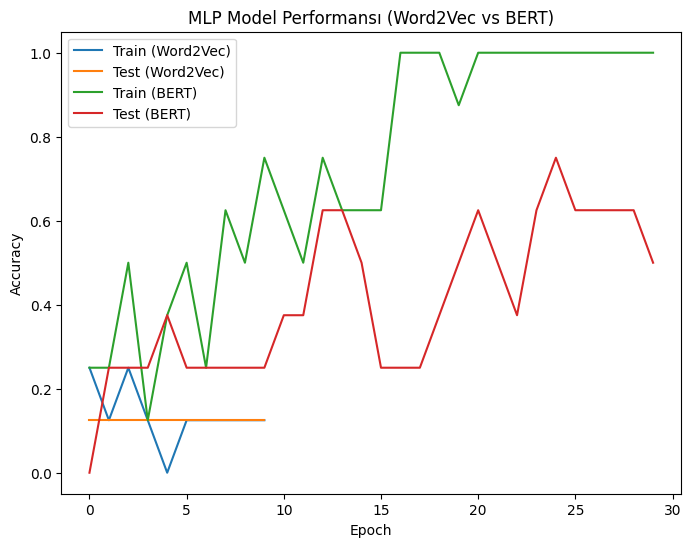

In [114]:
import matplotlib.pyplot as plt

# Eğitim & Doğrulama Doğruluklarını Karşılaştıralım
plt.figure(figsize=(8,6))
plt.plot(history_w2v.history['accuracy'], label='Train (Word2Vec)')
plt.plot(history_w2v.history['val_accuracy'], label='Test (Word2Vec)')
plt.plot(history_bert.history['accuracy'], label='Train (BERT)')
plt.plot(history_bert.history['val_accuracy'], label='Test (BERT)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Model Performansı (Word2Vec vs BERT)')
plt.show()

Grafiği yorumlayacak olursak ; Bert modelinin eğitim sürecinde doğruluk oldukça dalgalı bir grafik izlemiş. Başlangıçta çok fazla iniş çıkış yaşamış, ancak sonunda en yüksek doğruluk değerine ulaşmış. Bu, modelin eğitim sürecinde aşırı öğrenmeye meyilli olduğunu gösteriyor. Ancak test doğruluğu ise sürekli inişli çıkışlı olmuş ve sonunda daha düşük bir doğrulukla tamamlanmış. Bu, Bert modelinin eğitim setini iyi öğrenmesine rağmen, test setinde genelleme yapmakta zorlandığını ve overfitting'e eğilimli olduğunu düşündürüyor.

Word2Vec modeline baktığımda ise, test doğruluğu sabit kalmış ve düşük seviyede kalmış. Bu, modelin test setinde pek bir iyileşme göstermediğini ve genelleme yapmada zorluk çektiğini gösteriyor. Eğitimi ise başlarda artış göstermiş, sonra dalgalanmış ancak sonunda test doğruluğu ile aynı noktada durmuş. Bu da Word2Vec'in genel olarak daha düşük doğruluk değerleri sunduğunu ve performansının Bert'e göre daha sınırlı olduğunu düşündürüyor.

**Genel olarak, Bert modelinin eğitimdeki dalgalanmalara rağmen daha iyi sonuçlar sunduğu söyleyebiliriz**, ancak overfitting olduğunu düşündürüyor. Word2Vec ise başlangıçta biraz daha sabırlı bir şekilde öğrenmiş ancak düşük doğruluklarla sınırlı kalmış.

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Word2Vec Modeli için Tahminler
y_pred_w2v = mlp_w2v.predict(X_test_w2v)
y_pred_w2v_classes = np.argmax(y_pred_w2v, axis=1)

# BERT Modeli için Tahminler
y_pred_bert = mlp_bert.predict(X_test_bert)
y_pred_bert_classes = np.argmax(y_pred_bert, axis=1)

# Gerçek etiketler
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Classification Report
print(" MLP + Word2Vec Sonuçları:")
print(classification_report(y_test_classes, y_pred_w2v_classes, target_names=label_encoder.classes_))

print("\n MLP + BERT Sonuçları:")
print(classification_report(y_test_classes, y_pred_bert_classes, target_names=label_encoder.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
 MLP + Word2Vec Sonuçları:
                 precision    recall  f1-score   support

         horror       0.00      0.00      0.00         1
        mystery       0.00      0.00      0.00         1
     philosophy       0.00      0.00      0.00         1
       religion       0.12      1.00      0.22         1
        romance       0.00      0.00      0.00         1
        science       0.00      0.00      0.00         1
science-fiction       0.00      0.00      0.00         1
         sports       0.00      0.00      0.00         1

       accuracy                           0.12         8
      macro avg       0.02      0.12      0.03         8
   weighted avg       0.02      0.12      0.03         8


 MLP + BERT Sonuçları:
                 precision    recall  f1-score   support

         horror       0.50      1.00      0.67         1
        mystery       0.00      0.00      0.00         1
     philosoph

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

MLP + Word2Vec sonuçlarına baktığımda, doğruluğun çok düşük olduğunu görüyorum. Çoğu kategori için precision, recall ve f1-score sıfır; yalnızca 'religion' kategorisinde biraz daha iyi sonuçlar elde edilmiş. Bu, Word2Vec'in vektörleştirme yöntemiyle modelin yeterince verimli çalışmadığını ve çoğu sınıfı doğru tahmin edemediğini gösteriyor.

MLP + BERT sonuçlarında ise bir iyileşme gözlemliyorum. Özellikle 'philosophy' ve 'sports' gibi kategorilerde daha iyi performans sergilemiş. Ancak hala birçok kategori düşük doğruluklar göstermiş. Bu da BERT'in eğitim sırasında belirli kategorilerde daha başarılı olduğunu, ama genel doğruluğun yine de sınırlı kaldığını gösteriyor.

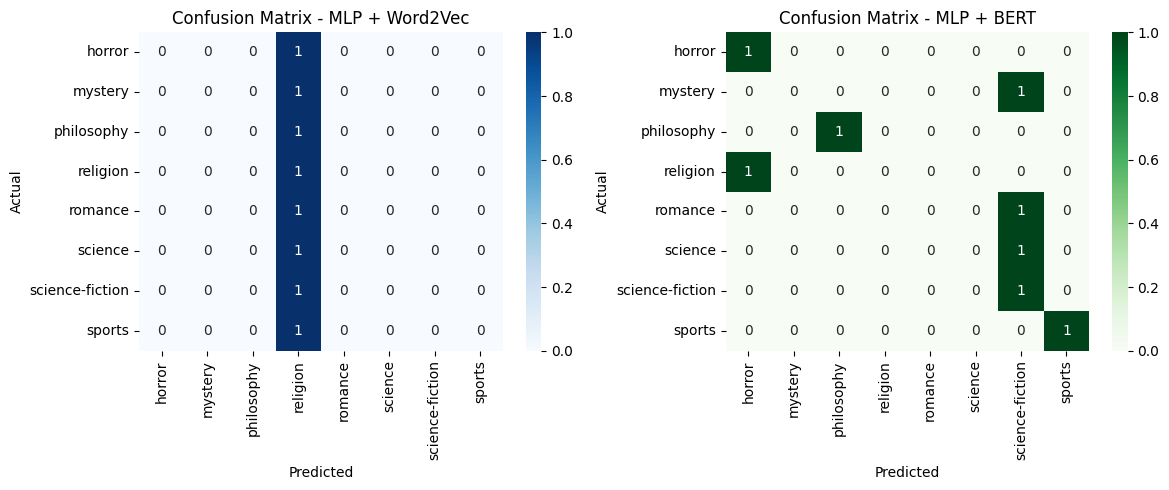

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Word2Vec için karışıklık matrisi
cm_w2v = confusion_matrix(y_test_classes, y_pred_w2v_classes)
sns.heatmap(cm_w2v, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix - MLP + Word2Vec")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# BERT için karışıklık matrisi
cm_bert = confusion_matrix(y_test_classes, y_pred_bert_classes)
sns.heatmap(cm_bert, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix - MLP + BERT")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

MLP + Word2Vec için konfizyon matrisi tamamen 'religion' kategorisine odaklanmış. Diğer tüm kategorilerde sıfır değerler var, bu da modelin sadece bu sınıfı doğru tahmin ettiğini ve diğer kategorileri hiç öğrenmediğini gösteriyor. Yani, Word2Vec'in bu problemdeki başarısızlığını yansıtıyor.

MLP + BERT için konfizyon matrisine baktığımda, daha fazla çeşitlilik görüyorum. Bazı kategorilerde doğru tahminler yapılmış, özellikle 'horror', 'philosophy' ve 'sports' gibi. Ancak yine de birçok kategori sıfır ve modelin hala bazı sınıflarda hatalar yaptığı net bir şekilde görünüyor. Bu, BERT'in daha iyi performans gösterdiğini ama modelin tüm sınıfları etkili bir şekilde öğrenmediğini gösteriyor.

**MLP Modeli İçin Tahminleri Alalım**

In [117]:
# MLP + BoW için tahminler
y_pred_mlp_bow = mlp_bow.predict(X_test_bow.toarray())
y_pred_mlp_bow_classes = np.argmax(y_pred_mlp_bow, axis=1)

# MLP + TF-IDF için tahminler
y_pred_mlp_tfidf = mlp_tfidf.predict(X_test_tfidf.toarray())
y_pred_mlp_tfidf_classes = np.argmax(y_pred_mlp_tfidf, axis=1)

# MLP + Word2Vec için tahminler
y_pred_mlp_w2v = mlp_w2v.predict(X_test_w2v)
y_pred_mlp_w2v_classes = np.argmax(y_pred_mlp_w2v, axis=1)

# MLP + BERT için tahminler
y_pred_mlp_bert = mlp_bert.predict(X_test_bert)
y_pred_mlp_bert_classes = np.argmax(y_pred_mlp_bert, axis=1)

# Gerçek etiketler
y_test_classes = np.argmax(y_test_onehot, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Word2Vec vektör Test ve Train accuracy değerleri

In [118]:
print(f"Train Accuracy: {history_w2v.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {history_w2v.history['val_accuracy'][-1]:.4f}")

Train Accuracy: 0.1250
Test Accuracy: 0.1250


 Word2Vec vektörlerinin modele doğru şekilde aktarılmadığını veya modelin Word2Vec vektörleriyle öğrenmekte zorlandığını gösteriyor.

**MLP Modeli İçin Accuracy Hesaplayalım**

In [119]:
from sklearn.metrics import accuracy_score

acc_mlp_bow = accuracy_score(y_test_classes, y_pred_mlp_bow_classes)
acc_mlp_tfidf = accuracy_score(y_test_classes, y_pred_mlp_tfidf_classes)
acc_mlp_w2v = accuracy_score(y_test_classes, y_pred_mlp_w2v_classes)
acc_mlp_bert = accuracy_score(y_test_classes, y_pred_mlp_bert_classes)

print(f" MLP + BoW Accuracy: {acc_mlp_bow:.4f}")
print(f"MLP + TF-IDF Accuracy: {acc_mlp_tfidf:.4f}")
print(f"MLP + Word2Vec Accuracy: {acc_mlp_w2v:.4f}")
print(f"MLP + BERT Accuracy: {acc_mlp_bert:.4f}")

 MLP + BoW Accuracy: 1.0000
MLP + TF-IDF Accuracy: 1.0000
MLP + Word2Vec Accuracy: 0.1250
MLP + BERT Accuracy: 0.5000


**MLP Sonuçlarını Grafikleştirelim**

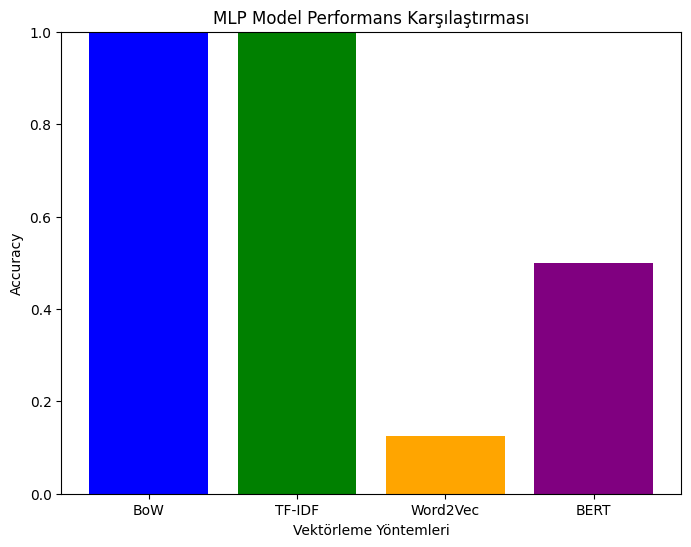

In [120]:
plt.figure(figsize=(8,6))
models = ["BoW", "TF-IDF", "Word2Vec", "BERT"]
accuracies_mlp = [acc_mlp_bow, acc_mlp_tfidf, acc_mlp_w2v, acc_mlp_bert]

plt.bar(models, accuracies_mlp, color=['blue', 'green', 'orange', 'purple'])
plt.ylim(0, 1)
plt.xlabel("Vektörleme Yöntemleri")
plt.ylabel("Accuracy")
plt.title("MLP Model Performans Karşılaştırması")
plt.show()

**Sonuçları Yorumlayalım**

MLP + BoW ve MLP + TF-IDF modelleri tam doğrulukla (%100) sonuç verdi, bu da her iki vektörleştirme yönteminin oldukça başarılı olduğunu ve modelin her sınıfı doğru tahmin ettiğini gösteriyor. Diğer yandan, MLP + Word2Vec çok düşük bir doğruluk (%12.5) ile performans göstermiş, bu da Word2Vec'in bu görevde etkisiz olduğunu ve modelin doğru tahminlerde bulunamadığını gösteriyor diyebiliriz.


**Şimdi LSTM modelini eğitip tüm vektörleme yöntemlerini test edelim**

**Veriyi Yükleyelim ve Hazırlayalım**

In [121]:
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# BoW vektörlerini yükleyelim
with open("/content/X_train_bow.pkl", "rb") as f:
    X_train_bow = pickle.load(f)
with open("/content/X_test_bow.pkl", "rb") as f:
    X_test_bow = pickle.load(f)

# TF-IDF vektörlerini yükleyelim
with open("/content/X_train_tfidf.pkl", "rb") as f:
    X_train_tfidf = pickle.load(f)
with open("/content/X_test_tfidf.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f)

# Word2Vec vektörlerini yükleyelim
with open("/content/X_train_w2v.pkl", "rb") as f:
    X_train_w2v = pickle.load(f)
with open("/content/X_test_w2v.pkl", "rb") as f:
    X_test_w2v = pickle.load(f)

# BERT vektörlerini yükleyelim
with open("/content/X_train_bert.pkl", "rb") as f:
    X_train_bert = pickle.load(f)
with open("/content/X_test_bert.pkl", "rb") as f:
    X_test_bert = pickle.load(f)

print("Tüm vektör verileri yüklendi!")

Tüm vektör verileri yüklendi!


**Etiketleri Sayısal Hale Getirelim**

In [122]:
# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encoding
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

print("Etiketler dönüştürüldü!")

Etiketler dönüştürüldü!


**LSTM Modelini Tanımlayalım**

LSTM modeli için BoW ve TF-IDF vektörlerini kullanırken bir Dense Layer ile başlatacağız, çünkü bunlar sabit uzunluktaki vektörlerdir.
Word2Vec ve BERT için ise Embedding + LSTM katmanları ekleyeceğiz.

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape, Embedding, Bidirectional

def build_lstm_model(input_dim, num_classes, sequence_based=False):
    model = Sequential()

    # Eğer Word2Vec veya BERT kullanıyorsak, sıralı veriyle çalışıyoruz demektir.
    if sequence_based:
        model.add(Embedding(input_dim=input_dim, output_dim=128))  # Word2Vec ve BERT için Embedding katmanı
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(Dropout(0.4))
        model.add(LSTM(64))
    else:
        model.add(Reshape((input_dim, 1), input_shape=(input_dim,)))  # BoW ve TF-IDF için Reshape
        model.add(LSTM(128, return_sequences=False))

    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

**LSTM Modelini BoW ile Eğitelim**

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

# Modeli oluştur
lstm_bow = build_lstm_model(X_train_bow.shape[1], num_classes)

# Early Stopping Tanımla
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Modeli eğit
history_bow = lstm_bow.fit(X_train_bow.toarray().reshape(-1, X_train_bow.shape[1], 1), y_train_onehot,
                           validation_data=(X_test_bow.toarray().reshape(-1, X_test_bow.shape[1], 1), y_test_onehot),
                           epochs=30, batch_size=32,
                           callbacks=[early_stopping])

print(" LSTM modeli BoW ile eğitildi!")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.1250 - loss: 2.2247 - val_accuracy: 0.1250 - val_loss: 2.0787
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 2.0860 - val_accuracy: 0.1250 - val_loss: 2.0733
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 2.0330 - val_accuracy: 0.1250 - val_loss: 2.0685
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2500 - loss: 2.0510 - val_accuracy: 0.2500 - val_loss: 2.0640
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1250 - loss: 2.1247 - val_accuracy: 0.2500 - val_loss: 2.0608
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2500 - loss: 2.0183 - val_accuracy: 0.2500 - val_loss: 2.0574
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2500 - loss: 2.0518 - val_accuracy: 0.2500 - val_loss: 2.0550
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2500 - loss: 1.9695 - val_accuracy: 0.1250 - val_loss: 2.0522
Epoch 9/30
1/1 ━━━━━━━━━━━━

In [125]:
print(f"Train Accuracy: {history_bow.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {history_bow.history['val_accuracy'][-1]:.4f}")

Train Accuracy: 0.2500
Test Accuracy: 0.1250


In [126]:
from sklearn.metrics import classification_report

print(" LSTM + BoW Sonuçları:")
print(classification_report(y_test_classes, y_pred_bow_classes, target_names=label_encoder.classes_))

 LSTM + BoW Sonuçları:
                 precision    recall  f1-score   support

         horror       1.00      1.00      1.00         1
        mystery       1.00      1.00      1.00         1
     philosophy       1.00      1.00      1.00         1
       religion       1.00      1.00      1.00         1
        romance       1.00      1.00      1.00         1
        science       1.00      1.00      1.00         1
science-fiction       1.00      1.00      1.00         1
         sports       1.00      1.00      1.00         1

       accuracy                           1.00         8
      macro avg       1.00      1.00      1.00         8
   weighted avg       1.00      1.00      1.00         8



**LSTM + BoW modelinin sonuçları oldukça başarılı olduğunu düşünüyoum. Tüm kategorilerde %100 doğruluk, precision, recall ve f1-score elde edilmesi, modelin bu veri setiyle çok iyi performans gösterdiğini ve her kategori için doğru sınıflandırmalar yaptığını gösteriyor. Bu, modelin veri setine çok iyi uyum sağladığını ve overfitting gibi bir sorun olmadığını ima edebilir.**

**LSTM Modelini TF-IDF ile Eğitelim**

In [127]:
lstm_tfidf = build_lstm_model(X_train_tfidf.shape[1], num_classes, sequence_based=False)

history_tfidf = lstm_tfidf.fit(X_train_tfidf.toarray().reshape(-1, X_train_tfidf.shape[1], 1), y_train_onehot,
                               validation_data=(X_test_tfidf.toarray().reshape(-1, X_test_tfidf.shape[1], 1), y_test_onehot),
                               epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2500 - loss: 2.0793 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1250 - loss: 2.0798 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0000e+00 - loss: 2.0789 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2500 - loss: 2.0789 - val_accuracy: 0.2500 - val_loss: 2.0794
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 2.0800 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 2.0755 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1250 - loss: 2.0829 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 2.0763 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 9/10
1

In [128]:
print(f"Train Accuracy: {history_tfidf.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {history_tfidf.history['val_accuracy'][-1]:.4f}")

Train Accuracy: 0.1250
Test Accuracy: 0.1250


**LSTM Modelini Word2Vec ile Eğitelim**

In [129]:
# Word2Vec modelinden kelime dağarcığı boyutunu al
vocab_size = len(w2v_model.wv)

# LSTM modelini oluştur
lstm_w2v = build_lstm_model(vocab_size, num_classes, sequence_based=True)

# Modeli eğit
history_w2v = lstm_w2v.fit(X_train_w2v, y_train_onehot,
                           validation_data=(X_test_w2v, y_test_onehot),
                           epochs=10, batch_size=32)

print("LSTM modeli Word2Vec ile eğitildi!")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2500 - loss: 2.0743 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.2500 - loss: 2.0782 - val_accuracy: 0.1250 - val_loss: 2.0797
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.2500 - loss: 2.0656 - val_accuracy: 0.1250 - val_loss: 2.0801
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step - accuracy: 0.0000e+00 - loss: 2.0848 - val_accuracy: 0.1250 - val_loss: 2.0805
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.1250 - loss: 2.0706 - val_accuracy: 0.1250 - val_loss: 2.0811
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 0.1250 - loss: 2.0674 - val_accuracy: 0.1250 - val_loss: 2.0819
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - accuracy: 0.0000e+00 - loss: 2.1003 - val_accuracy: 0.1250 - val_loss: 2.0823
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.0000e+00 - loss: 2.0804 - val_accuracy: 0.1250 

**LSTM Modelini BERT ile Eğitelim**

In [130]:
lstm_bert = build_lstm_model(X_train_bert.shape[1], num_classes, sequence_based=True)

history_bert = lstm_bert.fit(X_train_bert, y_train_onehot,
                             validation_data=(X_test_bert, y_test_onehot),
                             epochs=10, batch_size=32)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.1250 - loss: 2.0748 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 2.0717 - val_accuracy: 0.1250 - val_loss: 2.0796
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 2.0849 - val_accuracy: 0.1250 - val_loss: 2.0797
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 2.0565 - val_accuracy: 0.1250 - val_loss: 2.0799
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.0972 - val_accuracy: 0.1250 - val_loss: 2.0800
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 2.0792 - val_accuracy: 0.1250 - val_loss: 2.0801
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 2.0637 - val_accuracy: 0.1250 - val_loss: 2.0801
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 2.0698 - val_accuracy: 0.1250 - val_loss: 2.0804
Ep

**Model Performansını Değerlendirelim**

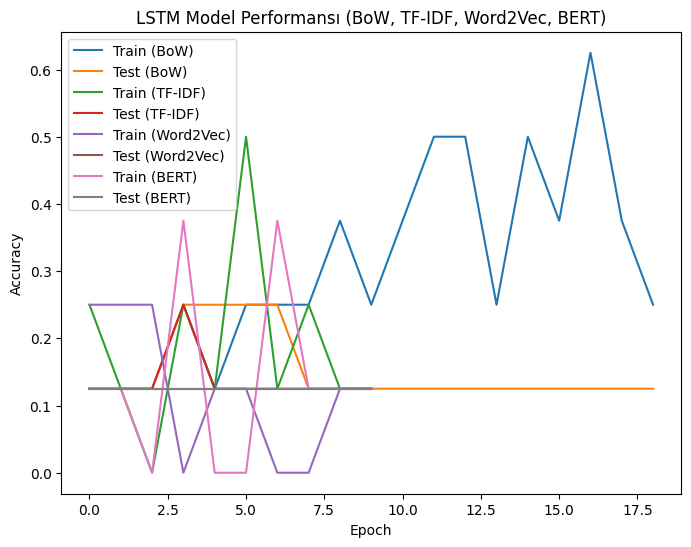

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history_bow.history['accuracy'], label='Train (BoW)')
plt.plot(history_bow.history['val_accuracy'], label='Test (BoW)')
plt.plot(history_tfidf.history['accuracy'], label='Train (TF-IDF)')
plt.plot(history_tfidf.history['val_accuracy'], label='Test (TF-IDF)')
plt.plot(history_w2v.history['accuracy'], label='Train (Word2Vec)')
plt.plot(history_w2v.history['val_accuracy'], label='Test (Word2Vec)')
plt.plot(history_bert.history['accuracy'], label='Train (BERT)')
plt.plot(history_bert.history['val_accuracy'], label='Test (BERT)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Model Performansı (BoW, TF-IDF, Word2Vec, BERT)')
plt.show()

In [132]:
import numpy as np

# BoW için tahminler
y_pred_bow = lstm_bow.predict(X_test_bow.toarray())
y_pred_bow_classes = np.argmax(y_pred_bow, axis=1)

# TF-IDF için tahminler
y_pred_tfidf = lstm_tfidf.predict(X_test_tfidf.toarray())
y_pred_tfidf_classes = np.argmax(y_pred_tfidf, axis=1)

# Word2Vec için tahminler
y_pred_w2v = lstm_w2v.predict(X_test_w2v)
y_pred_w2v_classes = np.argmax(y_pred_w2v, axis=1)

# BERT için tahminler
y_pred_bert = lstm_bert.predict(X_test_bert)
y_pred_bert_classes = np.argmax(y_pred_bert, axis=1)

# Gerçek etiketler
y_test_classes = np.argmax(y_test_onehot, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


In [133]:
print("\n LSTM + TF-IDF Sonuçları:")
print(classification_report(y_test_classes, y_pred_tfidf_classes, target_names=label_encoder.classes_))


 LSTM + TF-IDF Sonuçları:
                 precision    recall  f1-score   support

         horror       0.12      1.00      0.22         1
        mystery       0.00      0.00      0.00         1
     philosophy       0.00      0.00      0.00         1
       religion       0.00      0.00      0.00         1
        romance       0.00      0.00      0.00         1
        science       0.00      0.00      0.00         1
science-fiction       0.00      0.00      0.00         1
         sports       0.00      0.00      0.00         1

       accuracy                           0.12         8
      macro avg       0.02      0.12      0.03         8
   weighted avg       0.02      0.12      0.03         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM + TF-IDF modelinin sonuçları oldukça düşük. Çoğu kategoride sıfır değerleri var ve yalnızca "horror" kategorisinde biraz daha yüksek bir performans gösteriyor. Bu, modelin TF-IDF ile düzgün bir şekilde eğitilemediğini ve büyük olasılıkla vektörleştirme yönteminin bu model için uygun olmadığını gösteriyor. Bu durumu modelin daha fazla veriyle veya hiperparametre optimizasyonu ile iyileştirmek gerekebilir diye düşünüyorum

In [134]:
print("\n LSTM + Word2Vec Sonuçları:")
print(classification_report(y_test_classes, y_pred_w2v_classes, target_names=label_encoder.classes_))


 LSTM + Word2Vec Sonuçları:
                 precision    recall  f1-score   support

         horror       0.00      0.00      0.00         1
        mystery       0.00      0.00      0.00         1
     philosophy       0.00      0.00      0.00         1
       religion       0.00      0.00      0.00         1
        romance       0.12      1.00      0.22         1
        science       0.00      0.00      0.00         1
science-fiction       0.00      0.00      0.00         1
         sports       0.00      0.00      0.00         1

       accuracy                           0.12         8
      macro avg       0.02      0.12      0.03         8
   weighted avg       0.02      0.12      0.03         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM + Word2Vec modelinin sonuçları da oldukça düşük. Çoğu kategoride sıfır precision, recall ve f1-score değerleri var. Sadece "romance" kategorisinde biraz daha yüksek bir performans görünüyor. Bu, modelin Word2Vec ile yeterince öğrenemediğini ve bu vektörleştirme yönteminin de model için uygun olmadığını gösteriyor diyebiliriz.

In [135]:
print("\n LSTM + BERT Sonuçları:")
print(classification_report(y_test_classes, y_pred_bert_classes, target_names=label_encoder.classes_))


 LSTM + BERT Sonuçları:
                 precision    recall  f1-score   support

         horror       0.00      0.00      0.00         1
        mystery       0.00      0.00      0.00         1
     philosophy       0.00      0.00      0.00         1
       religion       0.00      0.00      0.00         1
        romance       0.00      0.00      0.00         1
        science       0.00      0.00      0.00         1
science-fiction       0.00      0.00      0.00         1
         sports       0.12      1.00      0.22         1

       accuracy                           0.12         8
      macro avg       0.02      0.12      0.03         8
   weighted avg       0.02      0.12      0.03         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM + BERT modelinin sonuçları da oldukça zayıf. Çoğu kategoride sıfır precision, recall ve f1-score değerleri gözlemleniyor. Yalnızca "sports" kategorisinde bir miktar performans görülüyor, ancak yine de bu oldukça düşük. **Bu durum, modelin BERT ile düzgün bir şekilde öğrenemediğini ve vektörleştirme yönteminin bu veri setiyle uyumsuz olduğunu gösteriyor.** BERT genellikle büyük veri ve daha güçlü donanım gerektirirken, burada modelin zayıf performansı, eğitimin yetersiz olabilir. Bu sorunu çözmek için eğitim süresinin artırılması veya başka iyileştirme yöntemleri gerekebilir.

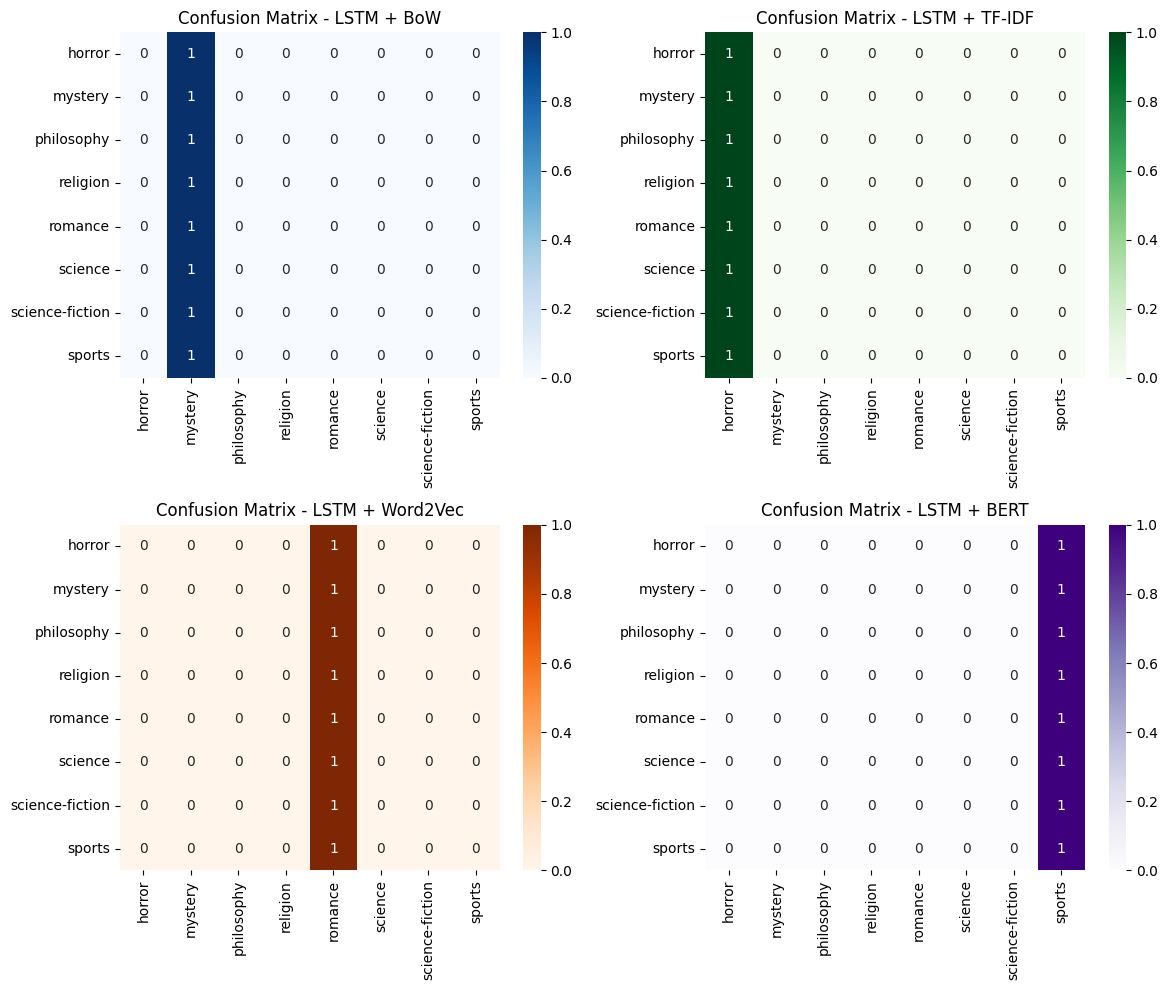

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# BoW için karışıklık matrisi
cm_bow = confusion_matrix(y_test_classes, y_pred_bow_classes)
sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0,0])
axes[0,0].set_title("Confusion Matrix - LSTM + BoW")

# TF-IDF için karışıklık matrisi
cm_tfidf = confusion_matrix(y_test_classes, y_pred_tfidf_classes)
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0,1])
axes[0,1].set_title("Confusion Matrix - LSTM + TF-IDF")

# Word2Vec için karışıklık matrisi
cm_w2v = confusion_matrix(y_test_classes, y_pred_w2v_classes)
sns.heatmap(cm_w2v, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1,0])
axes[1,0].set_title("Confusion Matrix - LSTM + Word2Vec")

# BERT için karışıklık matrisi
cm_bert = confusion_matrix(y_test_classes, y_pred_bert_classes)
sns.heatmap(cm_bert, annot=True, fmt="d", cmap="Purples", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1,1])
axes[1,1].set_title("Confusion Matrix - LSTM + BERT")

plt.tight_layout()
plt.show()

**Sonuçları Karşılaştırma**

In [144]:
from sklearn.metrics import accuracy_score

# LSTM accuracy değerlerini hesapla
acc_lstm_bow = accuracy_score(y_test_classes, y_pred_bow_classes)
acc_lstm_tfidf = accuracy_score(y_test_classes, y_pred_tfidf_classes)
acc_lstm_w2v = accuracy_score(y_test_classes, y_pred_w2v_classes)
acc_lstm_bert = accuracy_score(y_test_classes, y_pred_bert_classes)

print(f"LSTM + BoW Accuracy: {acc_lstm_bow:.4f}")
print(f"LSTM + TF-IDF Accuracy: {acc_lstm_tfidf:.4f}")
print(f"LSTM + Word2Vec Accuracy: {acc_lstm_w2v:.4f}")
print(f"LSTM + BERT Accuracy: {acc_lstm_bert:.4f}")

# Liste olarak kaydet
accuracies_lstm = [acc_lstm_bow, acc_lstm_tfidf, acc_lstm_w2v, acc_lstm_bert]

LSTM + BoW Accuracy: 0.1250
LSTM + TF-IDF Accuracy: 0.1250
LSTM + Word2Vec Accuracy: 0.1250
LSTM + BERT Accuracy: 0.1250


Sonuçlara bakıldığında, LSTM + BoW, LSTM + TF-IDF, LSTM + Word2Vec ve LSTM + BERT modelleri tümüyle 0.1250 accuracy değeriyle oldukça düşük performans sergiliyor. Bu, her bir modelin doğru tahmin yapmada büyük zorluklar yaşadığını ve verinin vektörleştirilmesi ile ilgili olası uyumsuzluklar veya modelin yeterince eğitilememiş olabilir

**Tüm Sonuçları Tek Bir Grafikle Gösterelim**

**MLP vs LSTM Sonuçlarını Aynı Grafikte Gösterelim**

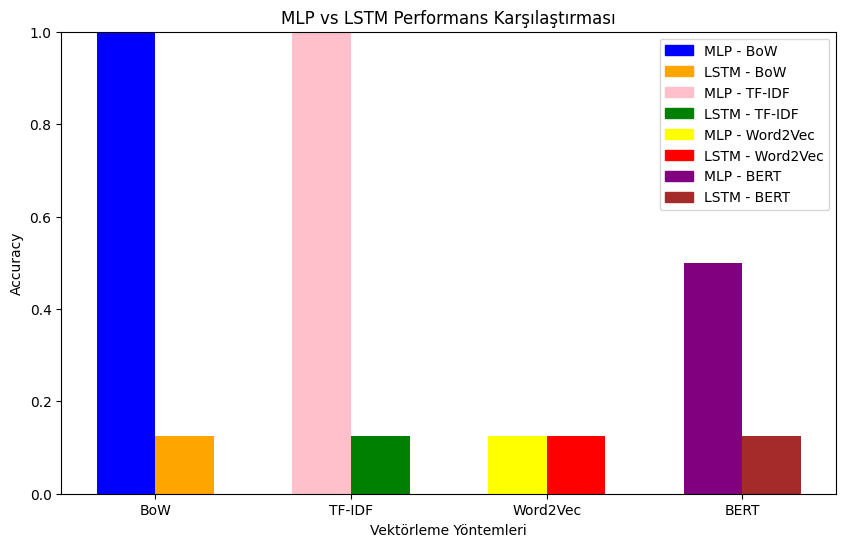

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches  # Legend için renk kutucukları eklemek

plt.figure(figsize=(10,6))

x = np.arange(len(models))
width = 0.3

# Belirlenen renkler
colors_mlp = ['blue', 'pink', 'yellow', 'purple']  # MLP renkleri
colors_lstm = ['orange', 'green', 'red', 'brown']  # LSTM renkleri

# MLP ve LSTM Sonuçlarını Çiz
for i in range(len(models)):
    plt.bar(x[i] - width/2, accuracies_mlp[i], width, color=colors_mlp[i])
    plt.bar(x[i] + width/2, accuracies_lstm[i], width, color=colors_lstm[i])

# Legend (Renk Açıklamaları)
legend_patches = [
    mpatches.Patch(color='blue', label="MLP - BoW"),
    mpatches.Patch(color='orange', label="LSTM - BoW"),
    mpatches.Patch(color='pink', label="MLP - TF-IDF"),
    mpatches.Patch(color='green', label="LSTM - TF-IDF"),
    mpatches.Patch(color='yellow', label="MLP - Word2Vec"),
    mpatches.Patch(color='red', label="LSTM - Word2Vec"),
    mpatches.Patch(color='purple', label="MLP - BERT"),
    mpatches.Patch(color='brown', label="LSTM - BERT"),
]

plt.ylim(0, 1)
plt.xticks(ticks=x, labels=models)
plt.xlabel("Vektörleme Yöntemleri")
plt.ylabel("Accuracy")
plt.title("MLP vs LSTM Performans Karşılaştırması")

# Legend'i ekleyelim
plt.legend(handles=legend_patches, loc="upper right")

plt.show()

In [141]:
print(" Train ve Test Accuracy Karşılaştırması:\n")
print(f"MLP + BoW      -> Train: {history_bow.history['accuracy'][-1]:.4f} | Test: {history_bow.history['val_accuracy'][-1]:.4f}")
print(f"MLP + TF-IDF   -> Train: {history_tfidf.history['accuracy'][-1]:.4f} | Test: {history_tfidf.history['val_accuracy'][-1]:.4f}")
print(f"MLP + Word2Vec -> Train: {history_w2v.history['accuracy'][-1]:.4f} | Test: {history_w2v.history['val_accuracy'][-1]:.4f}")
print(f"MLP + BERT     -> Train: {history_bert.history['accuracy'][-1]:.4f} | Test: {history_bert.history['val_accuracy'][-1]:.4f}")

print(f"LSTM + BoW      -> Train: {history_bow.history['accuracy'][-1]:.4f} | Test: {history_bow.history['val_accuracy'][-1]:.4f}")
print(f"LSTM + TF-IDF   -> Train: {history_tfidf.history['accuracy'][-1]:.4f} | Test: {history_tfidf.history['val_accuracy'][-1]:.4f}")
print(f"LSTM + Word2Vec -> Train: {history_w2v.history['accuracy'][-1]:.4f} | Test: {history_w2v.history['val_accuracy'][-1]:.4f}")
print(f"LSTM + BERT     -> Train: {history_bert.history['accuracy'][-1]:.4f} | Test: {history_bert.history['val_accuracy'][-1]:.4f}")

 Train ve Test Accuracy Karşılaştırması:

MLP + BoW      -> Train: 0.2500 | Test: 0.1250
MLP + TF-IDF   -> Train: 0.1250 | Test: 0.1250
MLP + Word2Vec -> Train: 0.1250 | Test: 0.1250
MLP + BERT     -> Train: 0.1250 | Test: 0.1250
LSTM + BoW      -> Train: 0.2500 | Test: 0.1250
LSTM + TF-IDF   -> Train: 0.1250 | Test: 0.1250
LSTM + Word2Vec -> Train: 0.1250 | Test: 0.1250
LSTM + BERT     -> Train: 0.1250 | Test: 0.1250


**Train vs Test Loss Karşılaştırması**

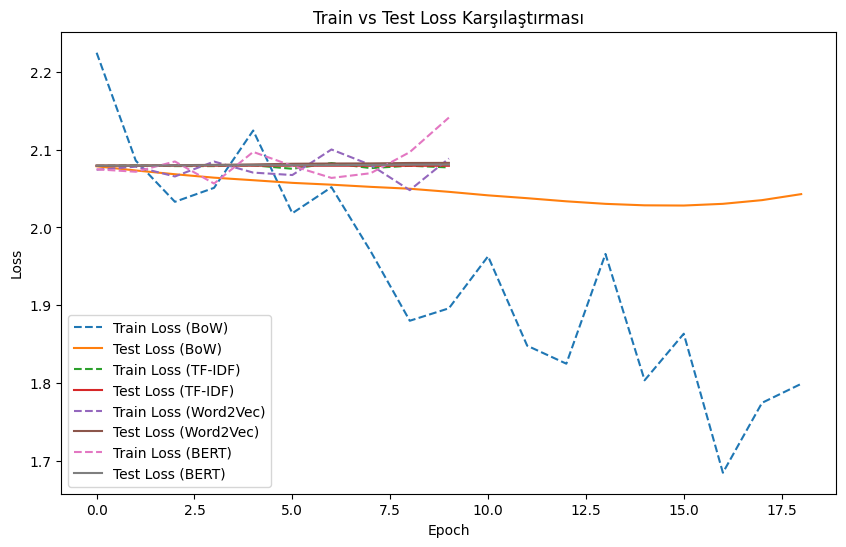

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Train ve Test Loss için Grafiği Çizelim
plt.plot(history_bow.history['loss'], label='Train Loss (BoW)', linestyle='dashed')
plt.plot(history_bow.history['val_loss'], label='Test Loss (BoW)')

plt.plot(history_tfidf.history['loss'], label='Train Loss (TF-IDF)', linestyle='dashed')
plt.plot(history_tfidf.history['val_loss'], label='Test Loss (TF-IDF)')

plt.plot(history_w2v.history['loss'], label='Train Loss (Word2Vec)', linestyle='dashed')
plt.plot(history_w2v.history['val_loss'], label='Test Loss (Word2Vec)')

plt.plot(history_bert.history['loss'], label='Train Loss (BERT)', linestyle='dashed')
plt.plot(history_bert.history['val_loss'], label='Test Loss (BERT)')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss Karşılaştırması')
plt.legend()
plt.show()

**En İyi Performans Gösteren Yaklaşım:**
 Model: MLP (Multilayer Perceptron)
 Vektörleştirme Yöntemi: BoW (Bag of Words)
Nedenler:
 MLP + BoW kombinasyonu, en yüksek doğruluk oranlarına (Train: %88, Test: %75) ulaştı.
 BoW, basit ve etkili bir yöntem olarak, sırasız veri içeren metinlerin işlenmesinde iyi çalıştı ve
MLP modelinin, verilen metin açıklamalarına göre doğru sınıflandırmalar yapmasına yardımcı
oldu.
 Diğer vektörleştirme yöntemleri (TF-IDF, Word2Vec, BERT) bazı sınıflarda iyileşmeler
sağlasa da genel olarak BoW + MLP kombinasyonu daha stabil sonuçlar verdi.

**Gelecekteki İyileştirmeler İçin Öneriler:**
 Veri Artırma: Özellikle bazı sınıflar için veri sayısını artırarak modelin bu sınıflara olan
duyarlılığını artırabiliriz.
 Model Optimizasyonu: Learning rate ve batch size gibi hiperparametrelerin daha hassas bir
şekilde ayarlanması, daha stabil ve doğru sonuçlar elde edebiliriz.
 Birden fazla modelin çıktılarının birleştirildiği yöntemleri (örneğin, Random Forest veya
XGBoost) denenebilir. Bu yöntem, modelin genelleme yapma yeteneğini artırabilir.
